# Importing file and librarys

In [1]:
import pandas as pd
import seaborn as sea
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import joblib

In [2]:
# print("pandas", pd.__version__)
# print("seaborn", sea.__version__)
# print("matplotlib", matplotlib.__version__)
# print("sklearn", sklearn.__version__)
# print("joblib", joblib.__version__)

# EDA

In [3]:
df = pd.read_csv("water_potability.csv")

Reading file

In [4]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [6]:
df.shape

(3276, 10)

There are 3276 rows and 10 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [9]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Feature ph, Sulfate, Trihalomethanes have null values are 491, 781, 162

In [10]:
df.isna().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

ph contain 14% null values, Sulfate have 23% and Trihalomethanes have 4% null values

In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

There is no chatagorical feature

In [12]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

There are 1998 zero and 1278 one

<Axes: xlabel='Potability', ylabel='count'>

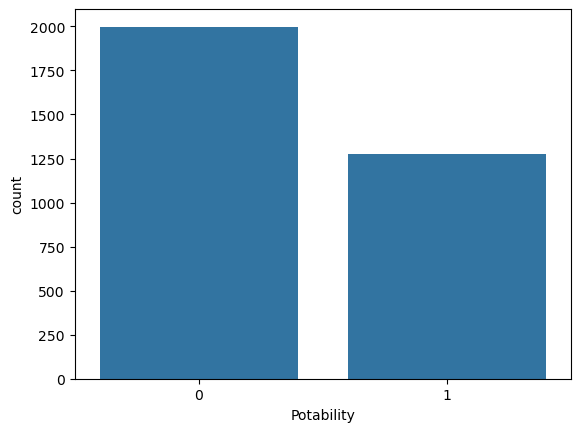

In [13]:
sea.countplot(x="Potability", data=df)

<Axes: >

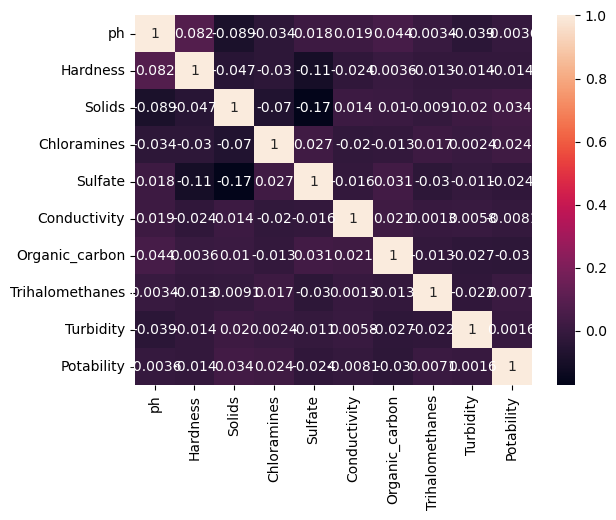

In [14]:
sea.heatmap(df.corr(), annot=True)

There is no highly co-relation between feature

In [15]:
# sea.pairplot(df)

<Axes: ylabel='ph'>

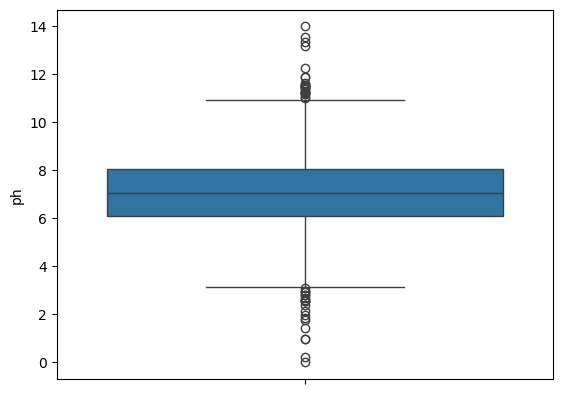

In [16]:
sea.boxplot(df["ph"])

<Axes: ylabel='Hardness'>

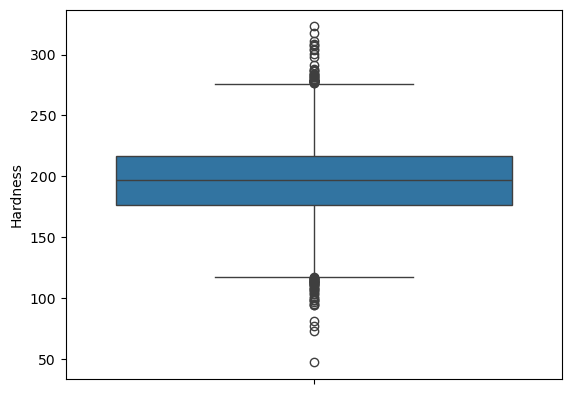

In [17]:
sea.boxplot(df['Hardness'])

<Axes: ylabel='Solids'>

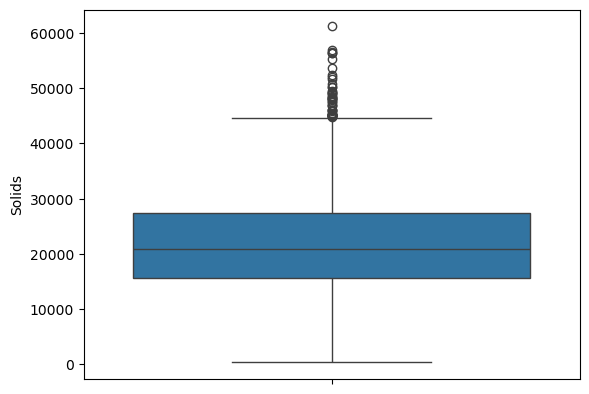

In [18]:
sea.boxplot(df["Solids"])

<Axes: ylabel='Chloramines'>

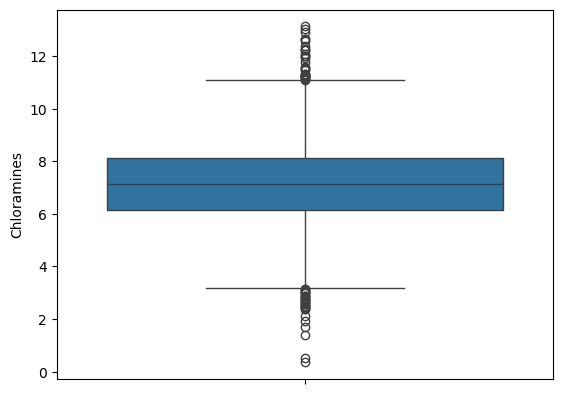

In [19]:
sea.boxplot(df["Chloramines"])

<Axes: ylabel='Sulfate'>

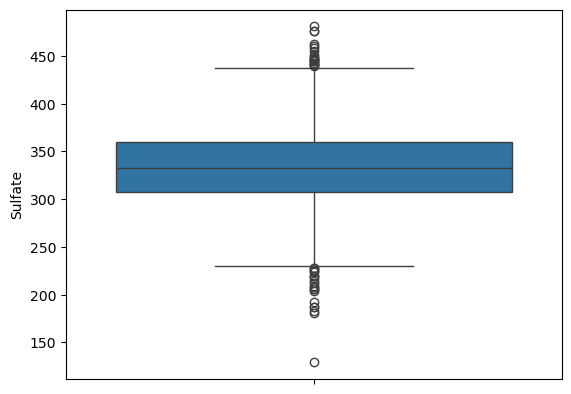

In [20]:
sea.boxplot(df["Sulfate"])

<Axes: ylabel='Conductivity'>

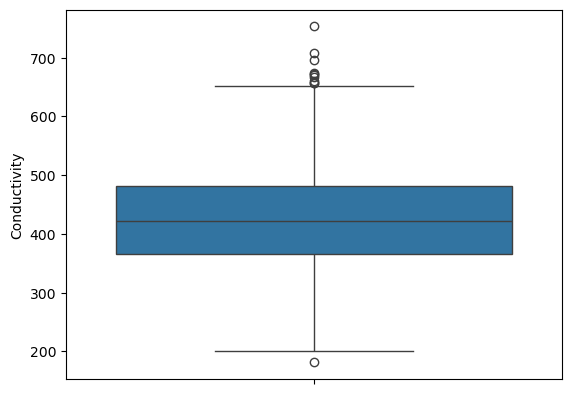

In [21]:
sea.boxplot(df["Conductivity"])

<Axes: ylabel='Organic_carbon'>

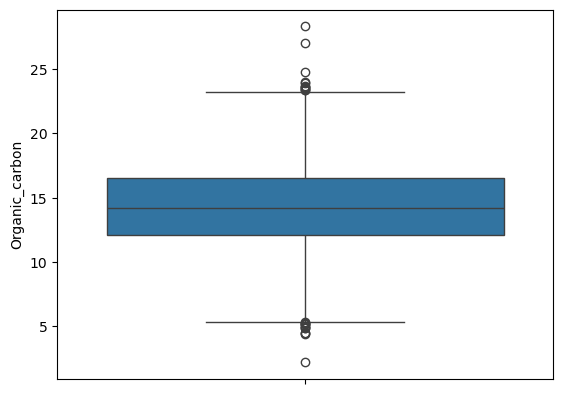

In [22]:
sea.boxplot(df["Organic_carbon"])

<Axes: ylabel='Trihalomethanes'>

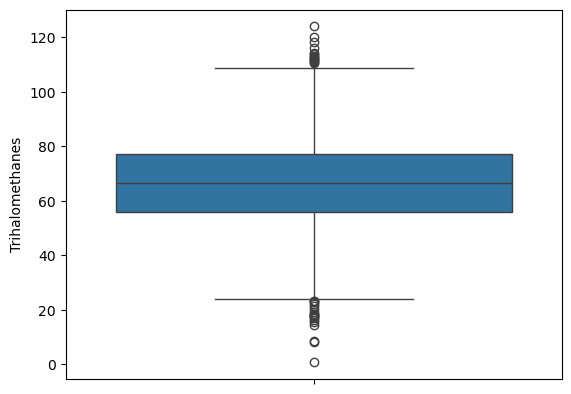

In [23]:
sea.boxplot(df["Trihalomethanes"])

<Axes: ylabel='Turbidity'>

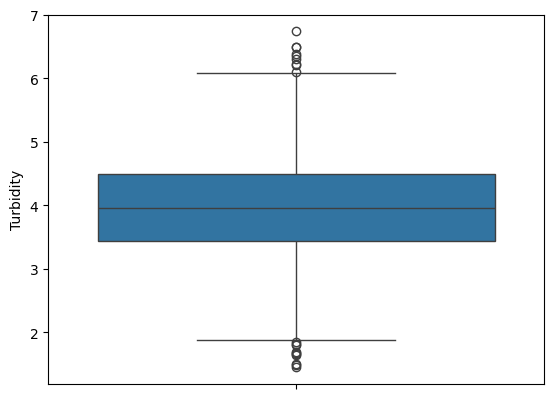

In [24]:
sea.boxplot(df["Turbidity"])

all Feature contain outliers

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

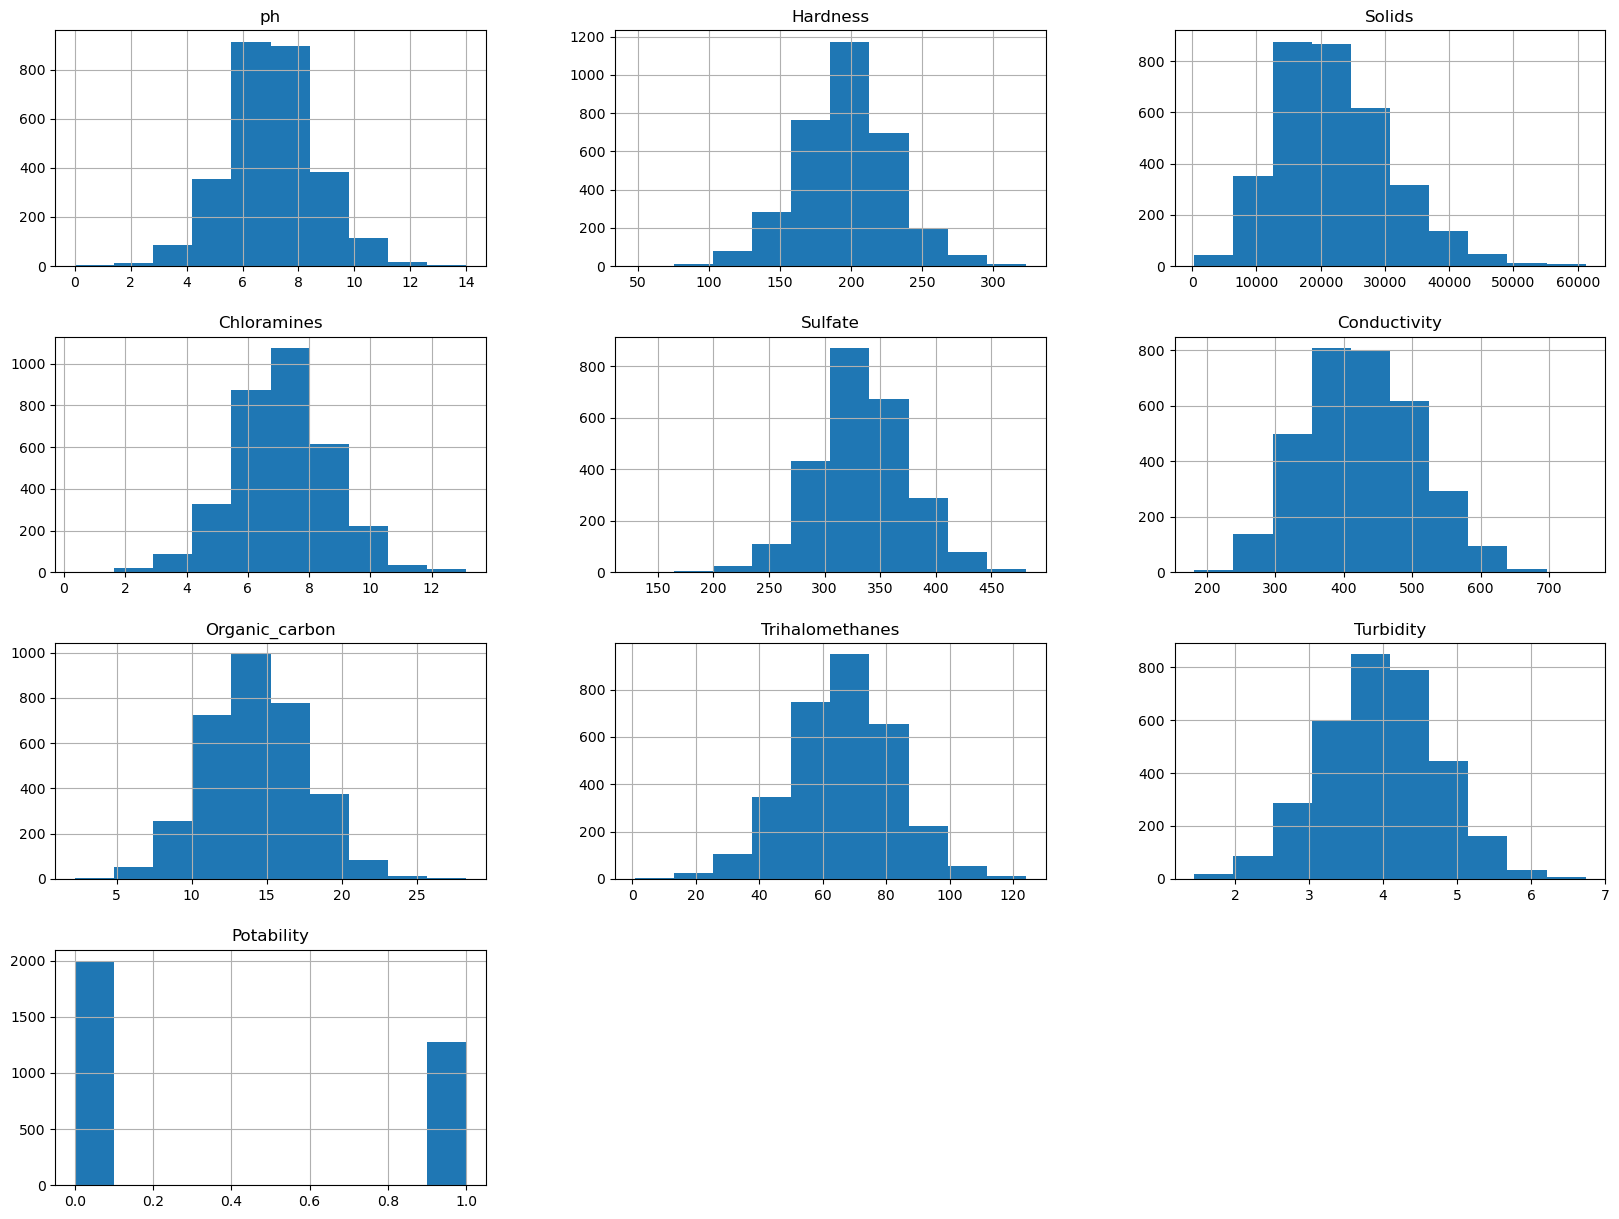

In [25]:
df.hist(figsize=(20,15))

All feature are normaly distributed, But feature Solids is right skewds

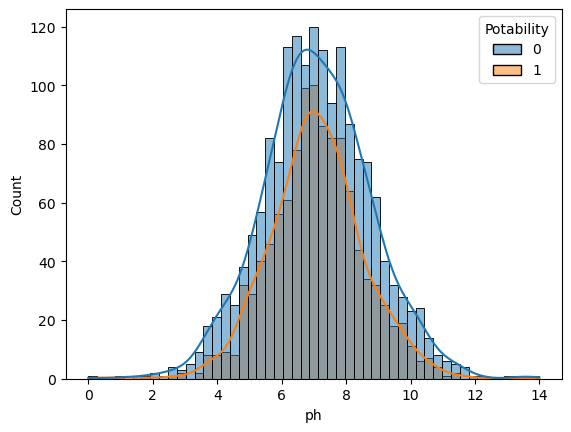

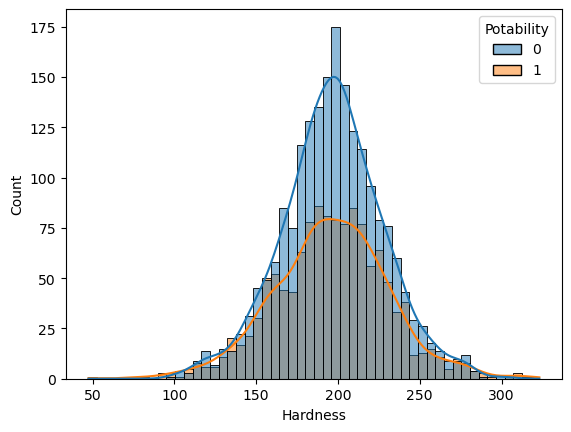

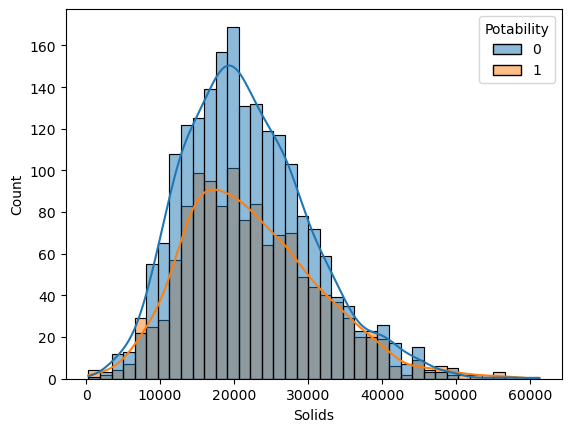

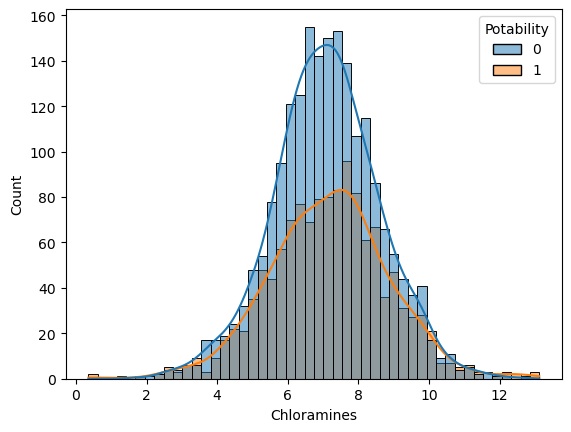

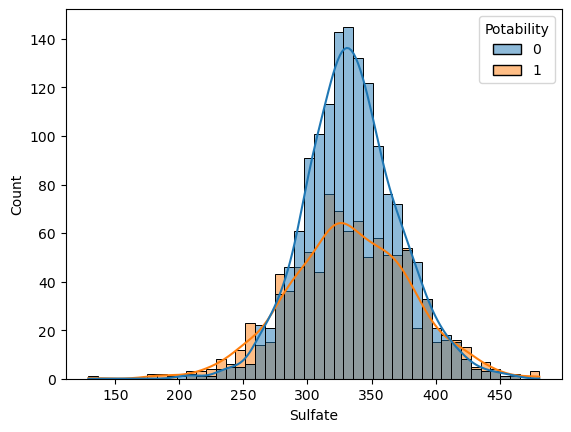

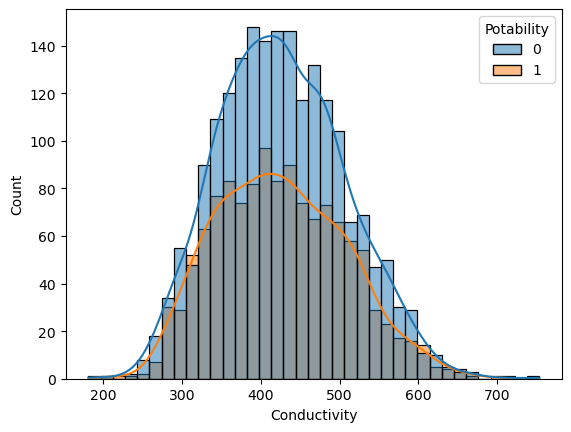

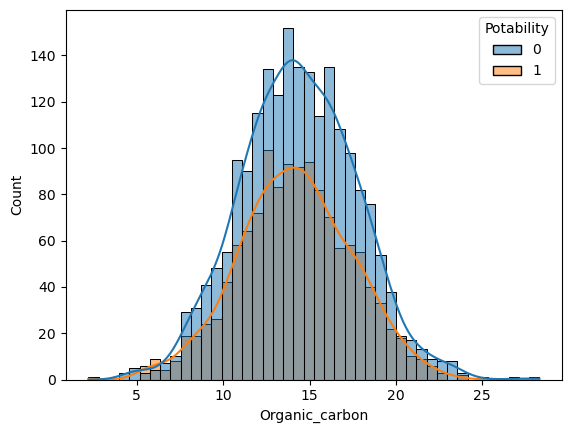

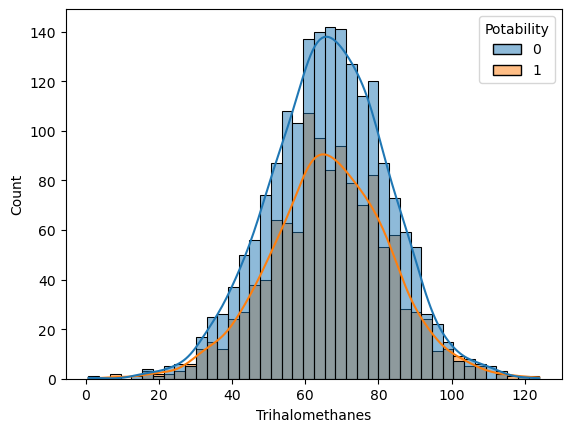

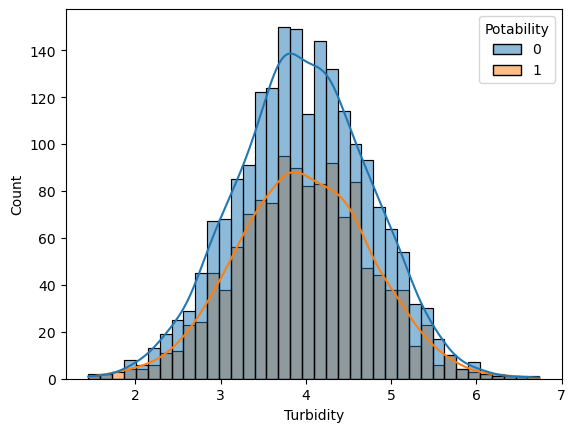

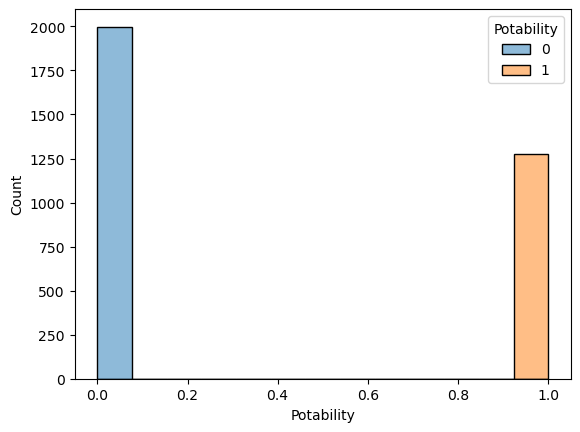

In [26]:
for col in df.columns:
    sea.histplot(data=df,x=col,kde=True,hue="Potability")
    plt.show()

Blue is greater than orange in all Feature. Here blue indicate water is not potable and orange is potable

In [27]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["ph"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["ph"].fillna(df["Trihalomethanes"].mean())

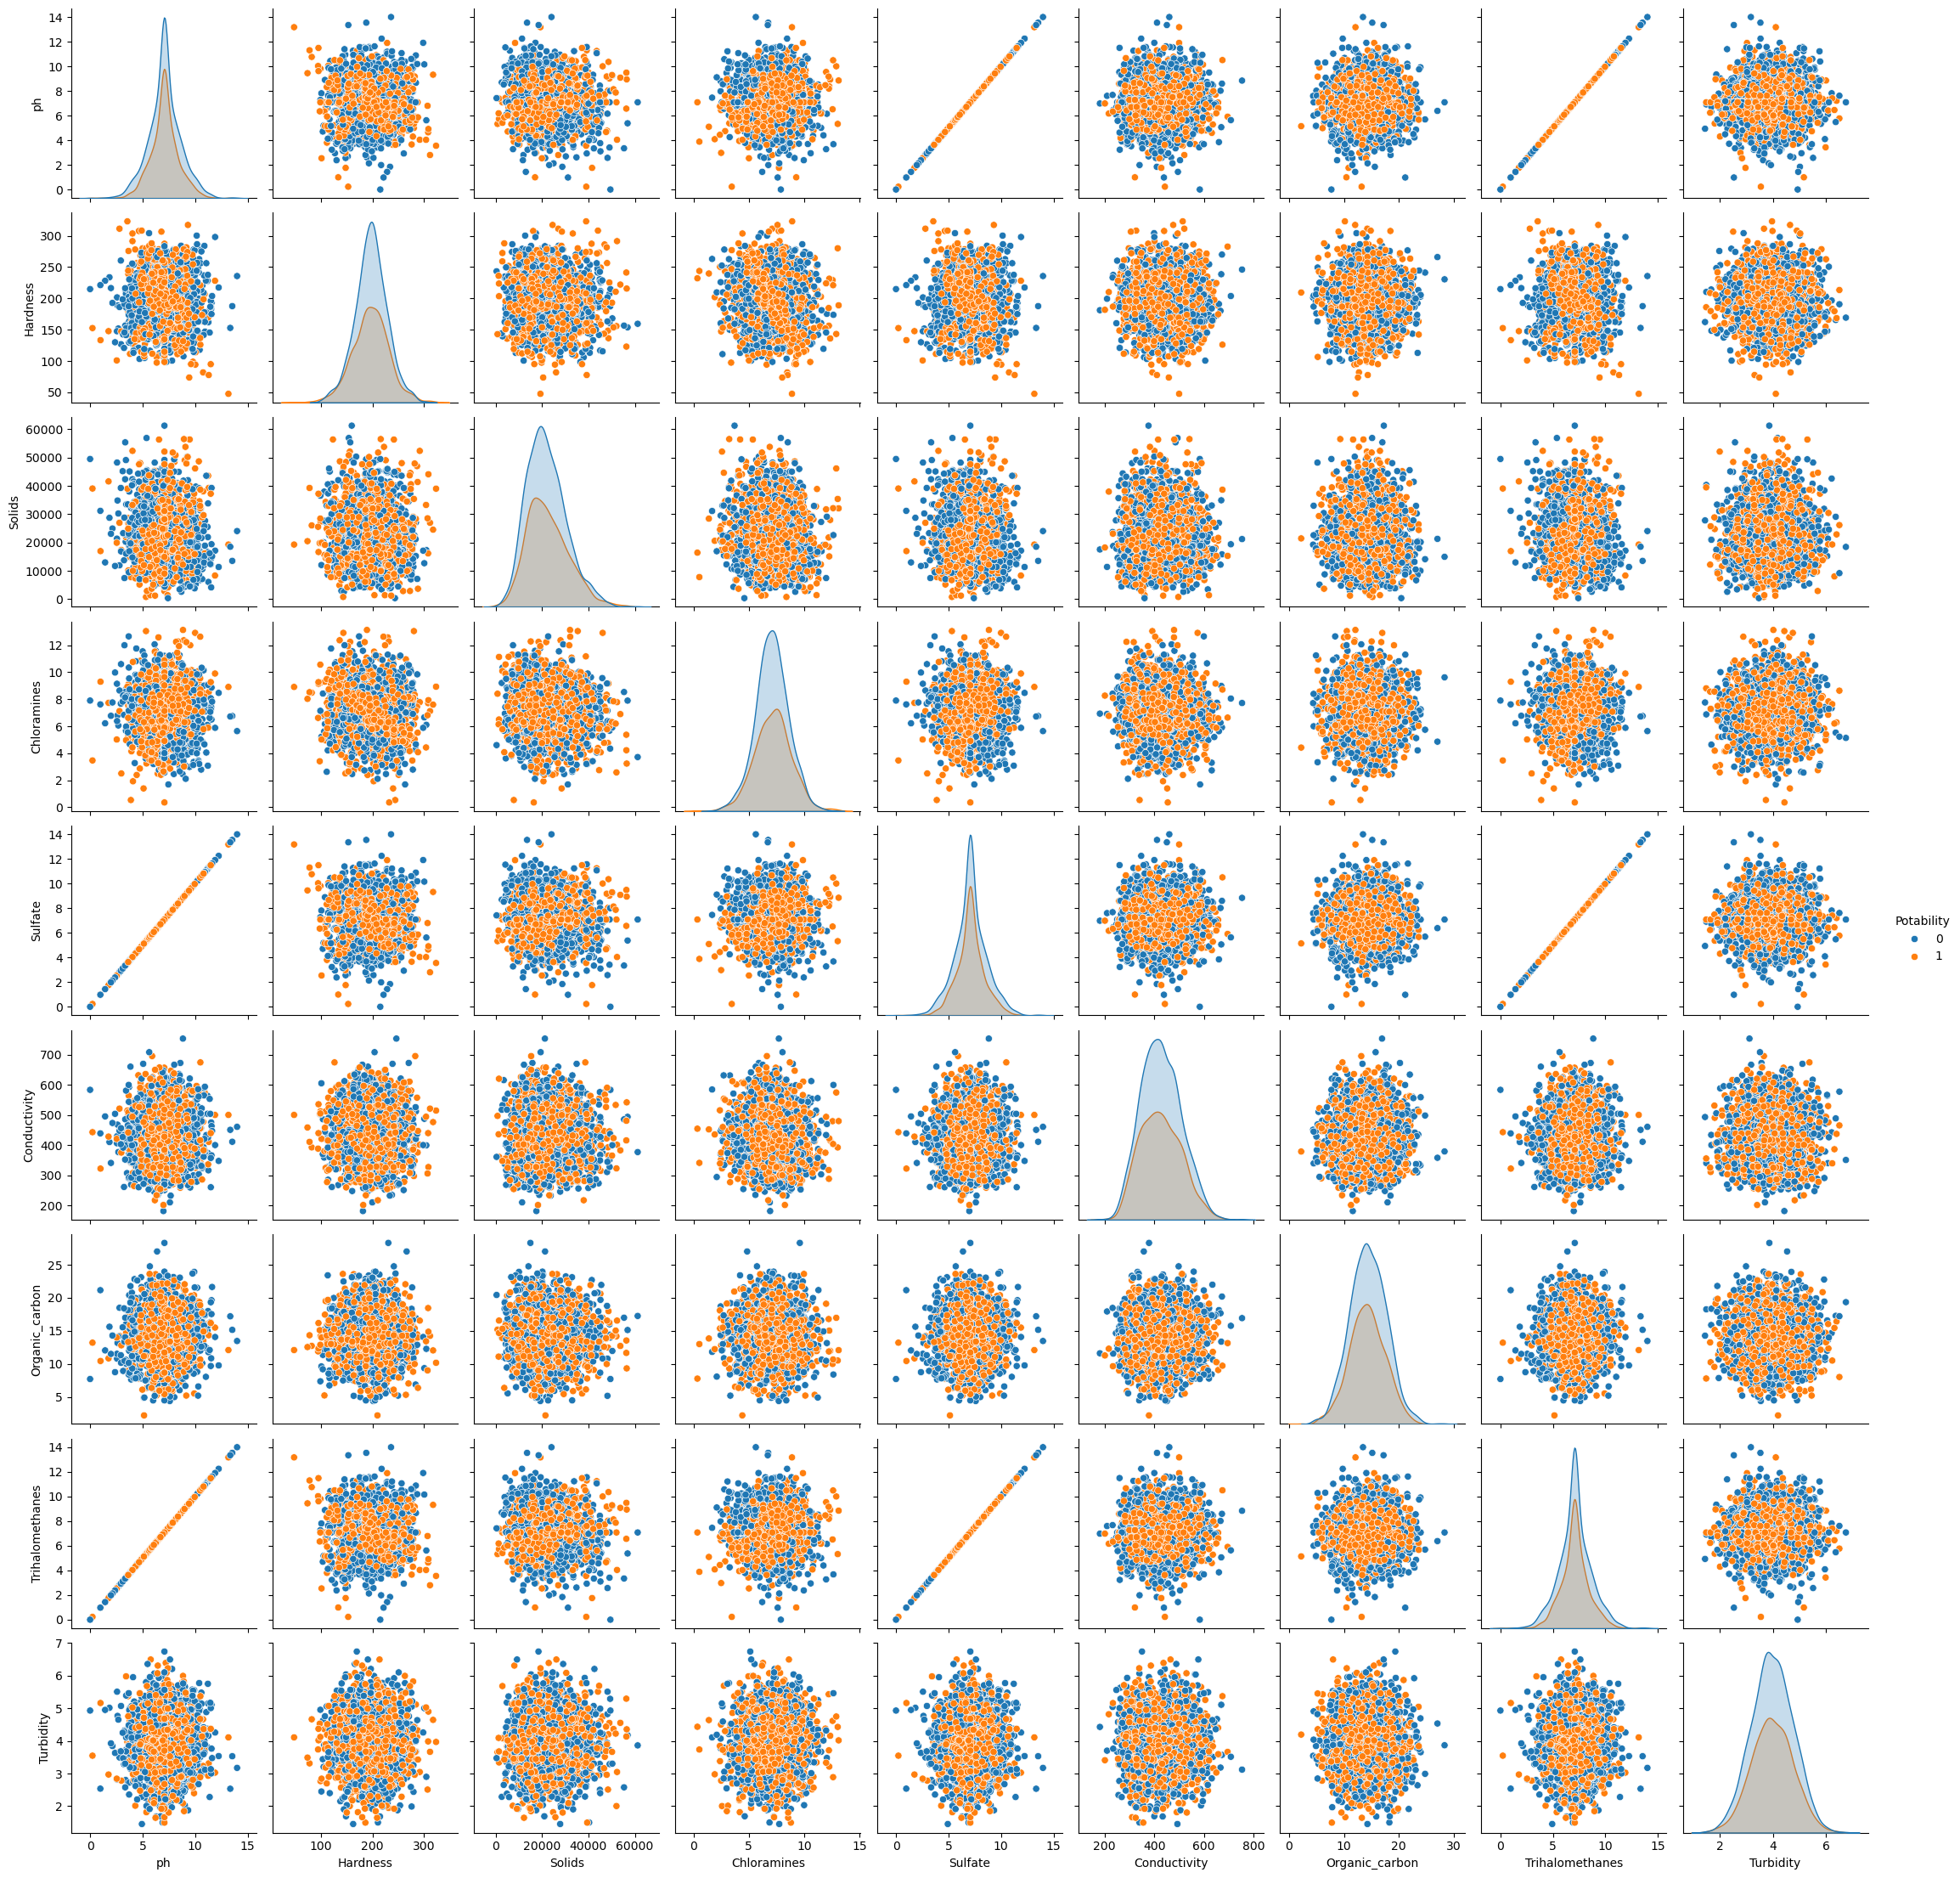

In [28]:
sea.pairplot(df,hue="Potability")

Filling null values using mean

In [29]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

There is no Null value

# Preprocessing

There is no categorical data so we dont use label encode

In [30]:
new_data = df.copy()

In [31]:
df_majority = new_data[new_data["Potability"] == 0]
df_minority = new_data[new_data["Potability"] == 1]

df_majority_downsample = resample(df_majority, replace=True, n_samples=1998, random_state=100)
df_minority_upsample = resample(df_minority, replace=True, n_samples=1998, random_state=100)

df_balance = pd.concat([df_minority_upsample, df_majority_downsample])

df_balance["Potability"].value_counts()


Potability
1    1998
0    1998
Name: count, dtype: int64

In [32]:
x = df_balance.iloc[:,:-1]

In [33]:
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [34]:
x

ph    Hardness        Solids  Chloramines   Sulfate  Conductivity  \
2042  7.669013  205.595635  11579.441693     4.263279  7.669013    407.721613   
329   7.672910  152.878305  22989.351184     6.231913  7.672910    401.140879   
1100  7.080795  213.041191  12036.643044     9.794730  7.080795    284.017995   
303   7.080795  181.689164  27776.180257     7.589869  7.080795    417.631202   
2302  7.080795  232.098339  16378.151576     0.352000  7.080795    454.555208   
...        ...         ...           ...          ...       ...           ...   
2659  4.884388  136.557785  28392.424976     8.440400  4.884388    386.104000   
550   7.460727  237.579612  25222.956004     7.277443  7.460727    377.682220   
2993  3.102076  198.488651  45148.808118     7.821650  3.102076    427.216764   
466   7.539882  185.825975  21575.245221     7.442999  7.539882    444.116633   
2580  5.946161  190.551572  12767.656229     8.939748  5.946161    499.937502   

      Organic_carbon  Trihalomethanes  Turbidity  
2042       10.829045         7.669013   4.589513  
329        14.252684         7.672910   4.268227  
1100       12.419906         7.080795   3.898916  
303         8.630091         7.080795   3.807920  
2302        7.764144         7.080795   4.431829  
...              ...              ...        ...  
2659       13.831877         4.884388   3.616701  
550         5.914617         7.460727   3.949015  
2993       15.530123         3.102076   4.248075  
466        15.830565         7.539882   4.531594  
2580       12.415430         5.946161   4.903632  

[3996 rows x 9 columns]

In [35]:
y = df_balance.iloc[:,-1]

In [36]:
y

2042    1
329     1
1100    1
303     1
2302    1
       ..
2659    0
550     0
2993    0
466     0
2580    0
Name: Potability, Length: 3996, dtype: int64

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 40, stratify=y)

splitting data into train and test

# Model Selection

1. Decision Tree
2. Random Forest
3. SVM

# Decision Tree

In [38]:
dt = DecisionTreeClassifier(max_depth=4)

In [39]:
hist = dt.fit(x_train,y_train)

In [40]:
y_pred = dt.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64       600
           1       0.61      0.35      0.44       599

    accuracy                           0.56      1199
   macro avg       0.58      0.56      0.54      1199
weighted avg       0.58      0.56      0.54      1199



Accuracy of Decision tree is 56%

# Random Forest

In [42]:
rfc = RandomForestClassifier(n_estimators=10)

To find best parameter we use Hyper Parameter Tunning

In [43]:
param = {"n_estimators" : [10, 20, 30, 40 ,50],"bootstrap" : [True, False]}

In [44]:
gsc = GridSearchCV(estimator=rfc, param_grid=param,scoring="accuracy")

In [45]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [46]:
gsc.best_params_

{'bootstrap': True, 'n_estimators': 30}

In [47]:
gsc.best_score_

0.7933490927676974

In [48]:
y_pred = gsc.predict(x_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       600
           1       0.85      0.83      0.84       599

    accuracy                           0.84      1199
   macro avg       0.84      0.84      0.84      1199
weighted avg       0.84      0.84      0.84      1199



Accuracy of Random forest is 85%

# SVM

In [50]:
svc = SVC()

To find best parameter we use Hyper Parameter Tunning

In [51]:
param = {"kernel" : ["linear", "poly", "rbf"]}

In [52]:
gsc = GridSearchCV(estimator=svc,param_grid=param,scoring="accuracy")

In [53]:
gsc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [54]:
gsc.best_params_

{'kernel': 'rbf'}

In [55]:
gsc.best_score_


0.5126859187324303

In [56]:
y_pred = gsc.predict(x_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63       600
           1       0.56      0.25      0.34       599

    accuracy                           0.53      1199
   macro avg       0.54      0.53      0.49      1199
weighted avg       0.54      0.53      0.49      1199



+Accuracy of SVM is 53%

# Conclusion

I have used Three Algorithms are Decision Tree, SVM and Random Forest. Out of which Random Forest Algorithm is giving us the best result with Accuracy 85%

In [58]:
# joblib.dump(gsc,open("model.pkl","wb"))